# Video: Visualizing PID Controllers

This video gives examples of PID controllers and compares them to linear quadratic regulators.

Script:
* Proportional-integral-derivative controllers, or PID controllers for short, are some of the most common control mechanisms deployed.
* Anecdotally, at least 95% of automated control mechanisms use PID controllers.
* This video will show you a simple example of PID control for a thermostat controlling temperature.

## Stable Temperature Problem

* Target temperature: 200° F
* Current temperature: 150° F
* Outside temperature: 70° F

Temperature difference will drop exponentially without active heating...

Script:
* The most common example of a PID controller is a thermostat.
* The thermostat in our home is pretty simple, and just turns heating and cooling on or off, so this example will be more appropriate to controlling the temperature of a vat of chemicals than a home.
* I picked a fairly high target temperature, 200° F, a current temperature of 150° F, and surrounding temperature of 70° F.
* Without active heating, the vat temperature will drop exponentially to match the surrounding temperature.


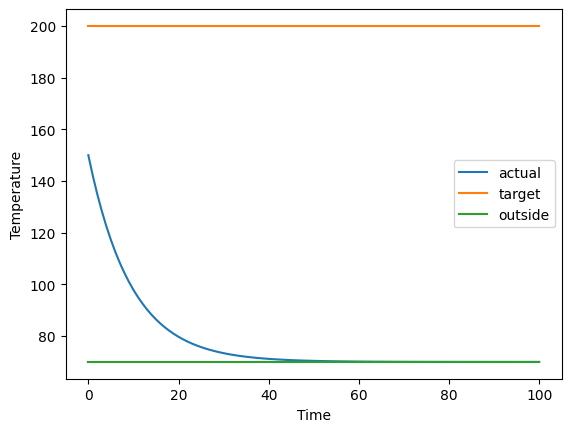

In [ ]:
import matplotlib.pyplot as plt

target_temperature = 200
outside_temperature = 70

temp_0 = 150
transfer_coefficient = 0.1

temps = [temp_0]
periods = 100
while len(temps) <= periods:
    temps.append(temps[-1] + (outside_temperature - temps[-1]) * transfer_coefficient)

plt.plot(temps, label="actual")
plt.plot([0, periods], [target_temperature, target_temperature], label="target")
plt.plot([0, periods], [outside_temperature, outside_temperature], label="outside")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.show();

Script:
* Given the assumptions so far, without active temperature management, the vat will cool pretty quickly.
* Let's look at setting up a PID controller.

## Proportional-Integral-Derivative Inputs

Three inputs derived from error $e(t)$:

* P: $e(t)$

* I: $\int_{-\infty}^t e(t) dt$

* D: $\frac{d}{dt} e(t)$


Script:
* PID controllers work with three input values.
* The P value is just the current error and it is used for the proportional response.
* The I value is for the integral of the errors up to the current time which takes into account long term errors and biases, and it is used for the integral response.
* The D value is for the derivative of the error so it can react to the error changing quickly, and it is used for the derivative response.
* Some PID controllers skip the derivative component, so they are really just proportional-integral controllers.

## Proportional-Integral-Derivative Parameters

Three parameters for PID controller:
* $K_P$
* $K_I$
* $K_D$


Script:
* For each of those components, there is a corresponding parameter or coefficient.
* Methods to pick these parameters vary depending on what you know about the underlying system.
* Sometimes they can be derived analytically, but often they are set and tuned empirically.

## Proportional-Integral-Derivative Response

$K_P e(t) + K_I \int_{-\infty}^t e(t) dt + K_D \frac{d}{dt} e(t)$

Script:
* Here is the formula for the response of the PID controller.
* You can think of this as how hard the PID controller is trying to make a change and what direction.
* However, this is likely controlling another process, say a heater, and the actual effect on the target variable is not necessarily linear in the PID response.
* For this simulation, I will ignore inertia effects and assume that the heating and cooling effects are proportional to the PID response.
* If I wanted to make this more realistic, I would probably add some inertia to represent a healing element which also needs to cool, and make negative responses for cooling do nothing.

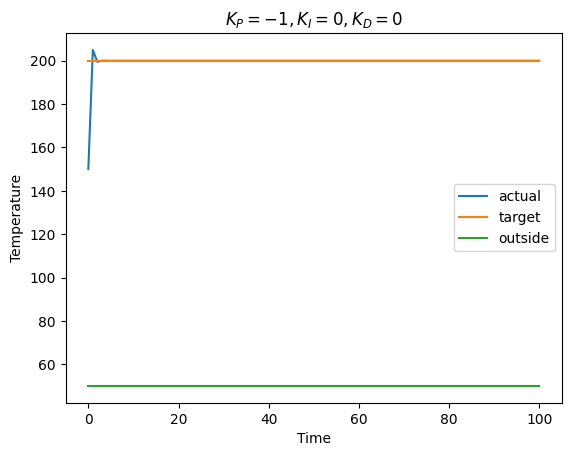

In [ ]:
def simulate_pid(k_p, k_i, k_d):
    temps = [temp_0]
    periods = 100

    v_i = 0
    v_d = 0
    while len(temps) <= periods:
        e = temps[-1] - target_temperature

        v_p = e
        v_i += e

        temps.append(temps[-1] - e * transfer_coefficient + k_p * v_p + k_i * v_i + k_d * v_d)

        v_d = (temps[-1] - temps[-2])

    plt.plot(temps, label="actual")
    plt.plot([0, periods], [target_temperature, target_temperature], label="target")
    plt.plot([0, periods], [outside_temperature, outside_temperature], label="outside")
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("Temperature")
    plt.title(f"$K_P={k_p}, K_I={k_i}, K_D={k_d}$")
    plt.show();

simulate_pid(-1, 0, 0)

Script:
* Here is a simulation of the PID process running with just the proportional parameter set to -1 and the rest set to 0.
* Usually these parameters are negative to counteract a bias and push back towards zero.
* You can see the initial response overshoot and then swing back, but it is pretty close to the target temperature after that.

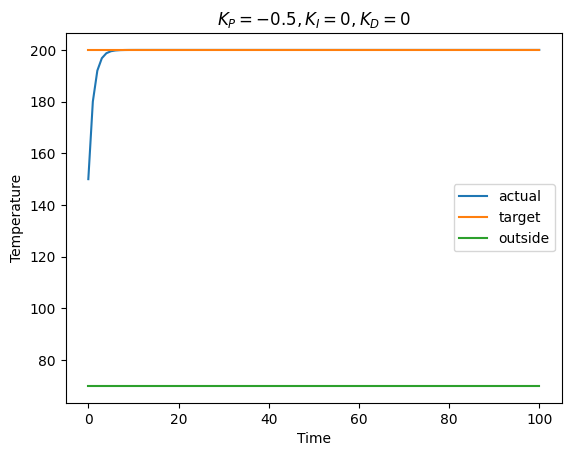

In [ ]:
simulate_pid(-0.5, 0, 0)

Script:
* If we have the parameter, it stops overshooting but takes longer to converge to the target.

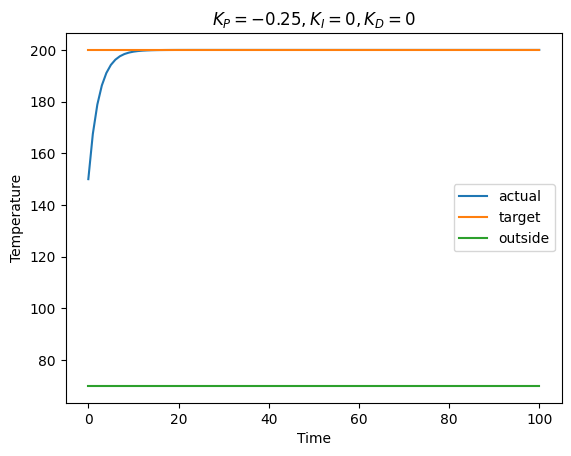

In [ ]:
simulate_pid(-0.25, 0, 0)

Script:
* If we have that parameter again, it takes even longer to converge.
* What if we make this parameter -2?

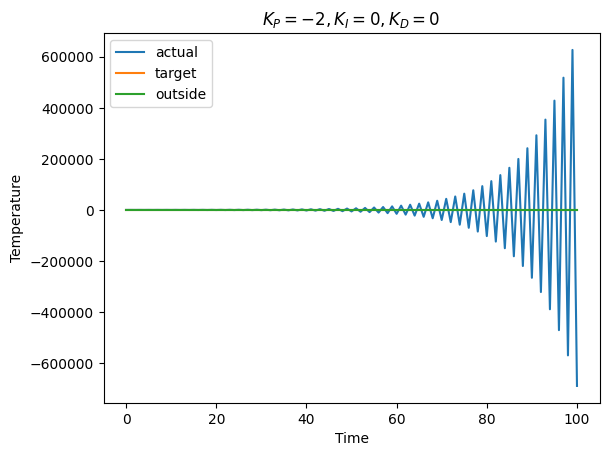

In [ ]:
simulate_pid(-2, 0, 0)

Script:
* Now it overshoots and oscillates wildly with increasing amplitudes.
* This is a situation that we generally want to avoid.
* The goal of a PID controller is to make the error zero, not make it bigger and bigger.

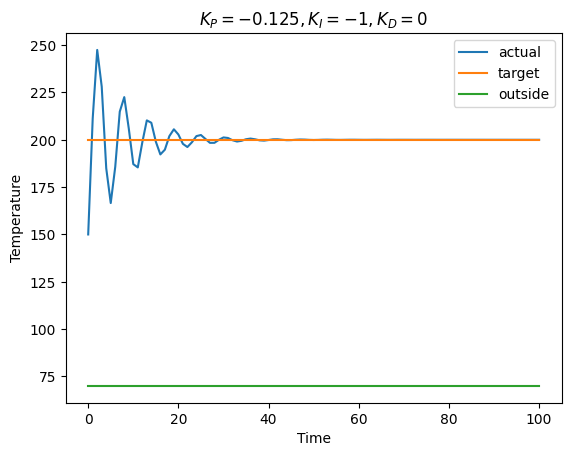

In [ ]:
simulate_pid(-0.125, -1, 0)

Script:
* If we go back to the small proportional parameter and add in the integral component, then we see it overshooting again.

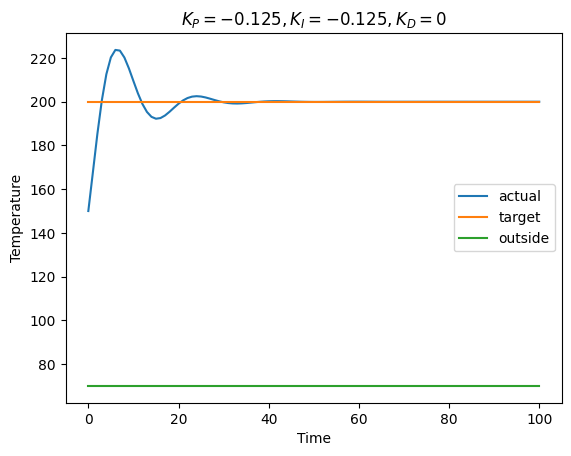

In [ ]:
simulate_pid(-0.125, -0.125, 0)

Script:
* If we make the integral parameter smaller, we see a smoother convergence, but it still oscillates around the target.

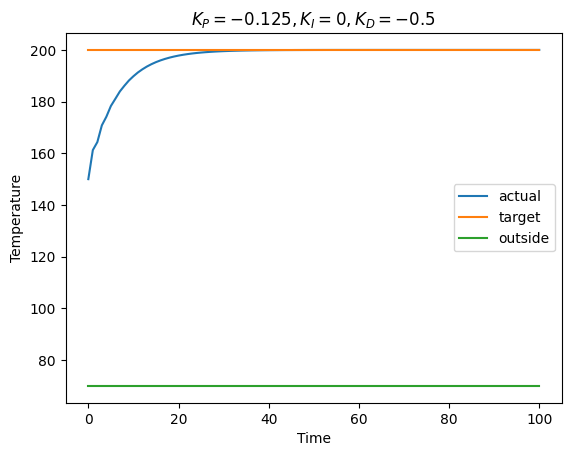

In [ ]:
simulate_pid(-0.125, 0, -0.5)

Script:
* If we use the derivative parameter instead, we can see it slowing down the convergence.

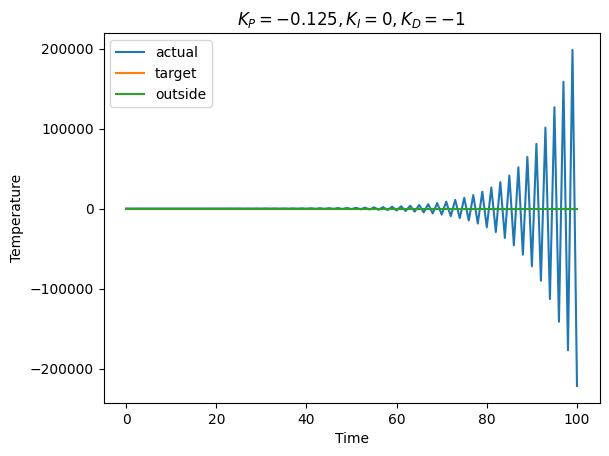

In [ ]:
simulate_pid(-0.125, 0, -1)

Script:
* But if we make derivative value higher, it can also create huge oscillations.
* The chemical vat will not survive those temperatures.
* Especially since they break the known laws of physics and go below absolute zero.


Script: (faculty on screen)
* PID controls are easy to setup.
* There is a bit of an art to picking their parameters if the system is unknown.
* Generally, you want the parameters large enough to bring the error close to zero in a reasonable amount of time, but not so fast that they produce persistent or increasing oscillations.
* PID controllers are a simple but often effective method for many control problems.